In [17]:
import numpy as np
import scipy
import librosa
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import wavfile

wavaudiofilepath = None

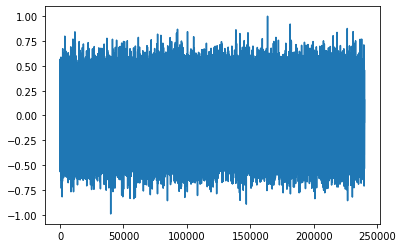

In [27]:
if wavaudiofilepath:
    sr, y =  wavfile.read(audiofile)
else:
    sr, y = 48000, np.random.randn(5*48000) # create 5 seconds of random audio


y = y/np.max(np.abs(y))

# plot audio signal
plt.figure()
plt.plot(y)
plt.show()

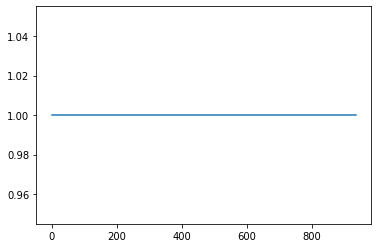

In [34]:
# n_fft and window length of 1024
# 25% overlap (hop)

n_fft = 1024
win_length = n_fft
hop_length = n_fft//4

D = librosa.stft(y, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window='hann')
D2 = scipy.signal.stft(y, padded=False, window='hann', nfft=n_fft, nperseg=n_fft, noverlap=n_fft-hop_length, boundary='zeros')[-1]

# scipy scales using the window, in this case a hann window is applied
hann_win = scipy.signal.get_window('hann', n_fft)
scale = np.sqrt(1.0 / hann_win.sum()**2)
D3 = D2.copy()
D3 = D3 / scale

bin_ = 0

# plot the ratio between each STFT sample in the chosen bin
# 1 implies perfect similarity
plt.figure()
plt.plot(np.abs(D[bin_] / D3[bin_]))
plt.show()

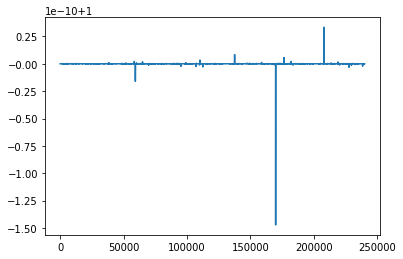

In [37]:
y_recon_rosa = librosa.istft(
                D,
                hop_length=hop_length,
                win_length=win_length,
            )

y_recon_scipy = scipy.signal.istft(
    D3,nfft=n_fft, nperseg=n_fft, noverlap=n_fft-hop_length, boundary=True
)[-1] * scale

# plot ratio between each sample in the reconstructed signal
# 1 implies perfect similarity
plt.figure()
plt.plot(y_recon_scipy/y_recon_rosa)
plt.show()